In [7]:
import os
import numpy as np
from PIL import Image
from netCDF4 import Dataset

In [ ]:
path = "D:/data-weather/data_sat/1/"
path_save = "D:/data-weather/data_sat_1_png_256x256/"
directory = os.fsencode(path)
size = (256,256)
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    newname = filename[0:12]+filename[13:15]+".png"
    nc = Dataset(path+filename, 'r')
    nc_data = nc.variables['data'][0][:]
    nc.close()
    data = np.array(nc_data[230:1000,1000:3500])
    if (data.min() < 0):
        print("ERROR")
    data = (data-data.min())/(data.max()-data.min())
    data = data*255.0
    data = data.astype(np.uint8)
    data = np.flipud(data)
    im = Image.fromarray(data)
    im = im.resize(size,Image.ANTIALIAS)
    im.save(path_save+newname)

In [ ]:
path = "D:/data-weather/data_sat/2/"
path_save = "D:/data-weather/data_sat_2_png_256x256/"
directory = os.fsencode(path)
size = (256,256)
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    newname = filename[0:12]+filename[13:15]+".png"
    nc = Dataset(path+filename, 'r')
    nc_data = nc.variables['data'][0][:]
    nc.close()
    data = np.array(nc_data[230:1000,1000:3500])
    data = (data-data.min())/(data.max()-data.min())
    data = data*255.0
    data = data.astype(np.uint8)
    data = np.flipud(data)
    im = Image.fromarray(data)
    im = im.resize(size,Image.ANTIALIAS)
    im.save(path_save+newname)

8224.0 2208.0


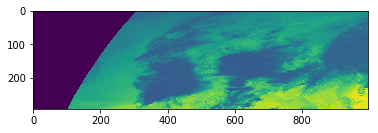

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
nc = Dataset("D:/data-weather/data_sat/2/sat.20170102.14.nc", 'r')
lon = nc.variables['lon'][:]
lat = nc.variables['lat'][:]
nc_data = nc.variables['data'][0][:]
print(nc_data.max(), nc_data.min())
nc_data[lon < -102] = 0
nc_data[lon > -82] = 0
nc_data[lat < 31]
plt.imshow(nc_data)
nc.close()